In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

import matplotlib.pyplot as plt

### Cross entropy

y_hat = tensor([ 1.5396,  0.4895, -1.5716])
y_hat.argmax(0) = tensor(0)

y_hat.softmax(0) = tensor([0.7171, 0.2509, 0.0319])
y_hat.softmax(0).sum() = tensor(1.0000)

y_hat.softmax(0).log() = tensor([-0.3325, -1.3826, -3.4437])
y_hat.log_softmax(0) = tensor([-0.3325, -1.3826, -3.4437])

-y_hat.log_softmax(0)[y_hat.argmax(0)] = tensor(0.3325)
crossentropy(y_hat, torch.tensor([1., 0., 0.])) = tensor(0.3325)


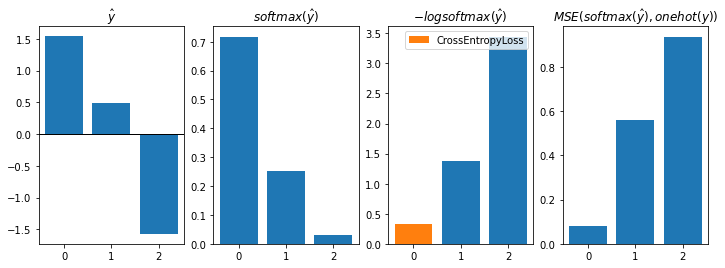

In [45]:
crossentropy = nn.CrossEntropyLoss()
y_hat = torch.randn(3)
y_hat, _ = y_hat.sort(descending=True)
y_hat

print(f'{y_hat = }')
print(f'{y_hat.argmax(0) = }')
print()

print(f'{y_hat.softmax(0) = }')
print(f'{y_hat.softmax(0).sum() = }')
print()

print(f'{y_hat.softmax(0).log() = }')
print(f'{y_hat.log_softmax(0) = }')
print()

print(f'{-y_hat.log_softmax(0)[y_hat.argmax(0)] = }')
print(f'{crossentropy(y_hat, torch.tensor([1., 0., 0.])) = }')

plt.figure(figsize=(12,4))
plt.subplot(141)
plt.title(r'$\hat{y}$')
plt.bar(range(len(y_hat)), y_hat)
plt.axhline(0, c='k', lw=1)

plt.subplot(142)
plt.title(r'$softmax(\hat{y})$')
plt.bar(range(len(y_hat)), y_hat.softmax(0))
plt.axhline(0, c='k', lw=1)

plt.subplot(143)
plt.title(r'$-logsoftmax(\hat{y})$')
plt.bar(range(len(y_hat)), -y_hat.log_softmax(0))
plt.bar(0, -y_hat.log_softmax(0)[y_hat.argmax(0)], label='CrossEntropyLoss')
plt.axhline(0, c='k', lw=1)
plt.legend()

plt.subplot(144)
plt.title(r'$MSE(softmax(\hat{y}), onehot(y))$')
plt.bar(range(len(y_hat)), (1-y_hat.softmax(0))**2)
plt.axhline(0, c='k', lw=1)
plt.show()

$$
\mathbf{J} = \
\dfrac{d\mathbf{f(x)}}{d\mathbf{x}} = \
\begin{bmatrix} \dfrac{\partial{\mathbf{f(x)}}}{\partial{x_1}} & \cdots & \dfrac{\partial{\mathbf{f(x)}}}{\partial{x_n}} \end{bmatrix} = \
\begin{bmatrix} \nabla^{\intercal}f_1 \\ \vdots \\ \nabla^{\intercal}f_m \end{bmatrix} = \
\begin{bmatrix}
\dfrac{\partial{f_1}}{\partial{x_1}} & \cdots & \dfrac{\partial{f_1}}{\partial{x_n}} \\
\vdots & \ddots & \vdots \\
\dfrac{\partial{f_m}}{\partial{x_1}} & \cdots & \dfrac{\partial{f_m}}{\partial{x_n}} \\
\end{bmatrix}
$$


In [94]:
x = torch.linspace(-1, 1, 3)
f = nn.Linear(3, 2, bias=True)
w, b = f.weight, f.bias

y_hat = w@x+b

autograd.functional.jacobian(y_hat, x)

TypeError: 'Tensor' object is not callable